# **Intro Data**

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Realestate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df['X1 transaction date']=df['X1 transaction date'].astype(int)

In [ ]:
new_names = ['No','date','age','dist','store','lat','long','price']
df = df.set_axis(new_names, axis="columns")

In [ ]:
df.set_index('No')

,date,age,dist,store,lat,long,price
No,,,,,,,
1,2012,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
410,2013,13.7,4082.01500,0,24.94155,121.50381,15.4
411,2012,5.6,90.45606,9,24.97433,121.54310,50.0
412,2013,18.8,390.96960,7,24.97923,121.53986,40.6


In [ ]:
dups=df.duplicated()
print(dups.any())

False


In [ ]:
Q1 = df.dist.quantile(0.25)
Q3 = df.dist.quantile(0.75)
IQR = Q3 - Q1
df_1 = df[~((df.dist < (Q1 - 1.5 * IQR)) | (df.dist > (Q3 +1.5 *IQR)))]
print(df.shape)
print(df_1.shape)

(414, 8)
(377, 8)


In [ ]:
Q1 = df_1.lat.quantile(0.25)
Q3 = df_1.lat.quantile(0.75)
IQR = Q3 - Q1
df_2 = df_1[~((df_1.lat < (Q1 - 1.5 * IQR)) | (df_1.lat > (Q3 + 1.5 * IQR)))]
print(df_1.shape)
print(df_2.shape)

(377, 8)
(376, 8)


In [ ]:
Q1 = df_2.long.quantile(0.25)
Q3 = df_2.long.quantile(0.75)
IQR = Q3 - Q1
df_3 = df_2[~((df_2.long < (Q1 - 1.5 * IQR)) | (df_2.long > (Q3 + 1.5 * IQR)))]
print(df_2.shape)
print(df_3.shape)

(376, 8)
(315, 8)


In [ ]:
Q1 = df_3.price.quantile(0.25)
Q3 = df_3.price.quantile(0.75)
IQR = Q3 - Q1
df_4 = df_3[~((df_3.price < (Q1 - 1.5 * IQR)) | (df_3.price > (Q3 + 1.5 * IQR)))]
print(df_3.shape)
print(df_4.shape)

(315, 8)
(303, 8)


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_5 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape)
print(df_5.shape)

(414, 8)
(371, 8)


<ipython-input-12-67204027714b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4['trans_dist'] =  np.log(df_4.dist.copy())
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


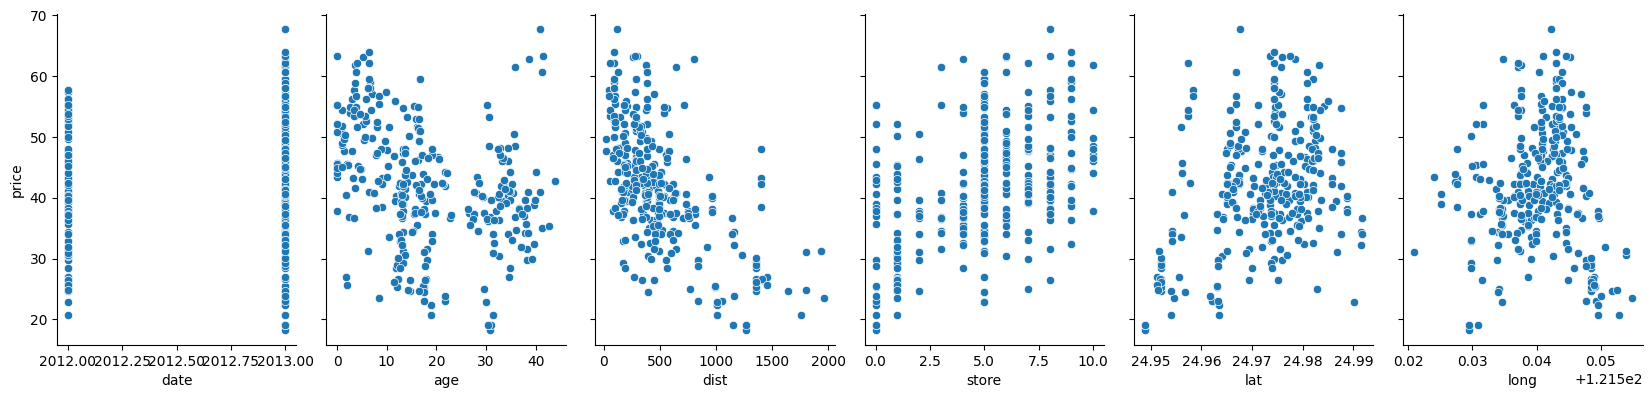

In [ ]:
df_4['trans_dist'] =  np.log(df_4.dist.copy())
p = sns.pairplot(df_4, x_vars=['date', 'age', 'dist', 'store',
       'lat', 'long'], y_vars= 'price', size=4, aspect=0.7)

In [ ]:
df.columns

Index(['No', 'date', 'age', 'dist', 'store', 'lat', 'long', 'price'], dtype='object')

# **Test Linear Regression df**

In [ ]:
from sklearn.model_selection import train_test_split
X1 = df.drop(['No','price','lat','long'],axis=1) # data fitur/prediktor
y1 = df.price # target
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size = 0.2,random_state = 0)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit (X1_train, y1_train)

reg.coef_

y1_pred = reg.predict(X1_test)

from sklearn.metrics import r2_score
print('r2 Score : ', r2_score(y1_test, y1_pred))

r2 Score :  0.6377224396688455


In [ ]:
df

,No,date,age,dist,store,lat,long,price
0,1,2012,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013,8.1,104.81010,5,24.96674,121.54067,52.5


# **Test Linear Regression df_5**

In [ ]:
from sklearn.model_selection import train_test_split
X1 = df_5.drop(['No','price','lat','long'],axis=1) # data fitur/prediktor
y1 = df_5.price # target
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size = 0.2,random_state = 0)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit (X1_train, y1_train)

reg.coef_

y1_pred = reg.predict(X1_test)

from sklearn.metrics import r2_score
print('r2 Score : ', r2_score(y1_test, y1_pred))

r2 Score :  0.4594577275611119


# **Test Linear Regression df_4**

In [ ]:
from sklearn.model_selection import train_test_split
X1 = df_4.drop(['No','price','dist','lat','long'],axis=1) # data fitur/prediktor
y1 = df_4.price # target
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size = 0.2,random_state = 0)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit (X1_train, y1_train)

reg.coef_

y1_pred = reg.predict(X1_test)

from sklearn.metrics import r2_score
print('r2 Score : ', r2_score(y1_test, y1_pred))

r2 Score :  0.5290572429758491


In [ ]:
X1

,date,age,store,trans_dist
0,2012,32.0,10,4.441225
1,2012,19.5,9,5.725527
2,2013,13.3,5,6.331474
3,2013,13.3,5,6.331474
4,2012,5.0,5,5.967603
...,...,...,...,...
406,2013,1.9,7,5.919266
410,2012,5.6,9,4.504864
411,2013,18.8,7,5.968630
412,2013,8.1,5,4.652150


In [ ]:
y1

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
406    40.5
410    50.0
411    40.6
412    52.5
413    63.9
Name: price, Length: 303, dtype: float64

# **Save/Import Model**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

# Ganti path dengan direktori yang Anda inginkan
directory = "/content/drive/MyDrive/YourDirectory"

if not os.path.exists(directory):
    os.makedirs(directory)

import pickle
print("Saving")
path = "/content/drive/MyDrive/YourDirectory/realestate_LR.sav"
pickle.dump(reg, open(path, "wb"))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Saving


In [ ]:
import pickle

# Muat model dari file pickle
with open('/content/drive/MyDrive/YourDirectory/realestate_LR.sav', 'rb') as file:
    loaded_model = pickle.load(file)

# **Input Model 1**

In [ ]:
import numpy as np

# Fungsi untuk memprediksi harga rumah dengan model MLP
def predict_price_lr(date,age,dist,store):
    # Persiapkan data input dengan format yang sesuai dengan model MLP
    input_data = [[date,age,dist,store]]

    # Lakukan prediksi dengan model MLP yang sudah dilatih (loaded_model)
    predicted_price = loaded_model.predict(input_data)

    return predicted_price[0]

# **Input Model 2**

In [ ]:
import numpy as np

# Fungsi untuk memprediksi harga rumah dengan model MLP
def predict_price_lr(date,age,store,trans_dist):
    # Persiapkan data input dengan format yang sesuai dengan model MLP
    input_data = [[date,age,store,trans_dist]]

    # Lakukan prediksi dengan model MLP yang sudah dilatih (loaded_model)
    predicted_price = loaded_model.predict(input_data)

    return predicted_price[0]

# **Test Prediksi 1**

In [ ]:
predict_price_lr(2012, 32.0, 84.87882, 10)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


45.64103117335617

In [ ]:
predict_price_lr(2012,19.5,306.59470,9)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


46.02202884462713

In [ ]:
df_5

,No,date,age,dist,store,lat,long,price
0,1,2012,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
408,409,2013,18.5,2175.74400,3,24.96330,121.51243,28.1
410,411,2012,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013,8.1,104.81010,5,24.96674,121.54067,52.5


# **Test Prediksi 2**

In [ ]:
predict_price_lr(2012,32.0,10,4.441225)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


48.46454929818174

In [ ]:
df_4

,No,date,age,dist,store,lat,long,price,trans_dist
0,1,2012,32.0,84.87882,10,24.98298,121.54024,37.9,4.441225
1,2,2012,19.5,306.59470,9,24.98034,121.53951,42.2,5.725527
2,3,2013,13.3,561.98450,5,24.98746,121.54391,47.3,6.331474
3,4,2013,13.3,561.98450,5,24.98746,121.54391,54.8,6.331474
4,5,2012,5.0,390.56840,5,24.97937,121.54245,43.1,5.967603
...,...,...,...,...,...,...,...,...,...
406,407,2013,1.9,372.13860,7,24.97293,121.54026,40.5,5.919266
410,411,2012,5.6,90.45606,9,24.97433,121.54310,50.0,4.504864
411,412,2013,18.8,390.96960,7,24.97923,121.53986,40.6,5.968630
412,413,2013,8.1,104.81010,5,24.96674,121.54067,52.5,4.652150
